<a href="https://colab.research.google.com/github/DevHugo-Cyber/DevHugo-Cyber/blob/main/Desafio_TelecomX_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importa√ß√£o e Carregamento

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif


df = pd.read_csv('/content/dados_tratados.csv')


def preprocess_data(df):
    df = df.copy()

    # Remover colunas irrelevantes
    df.drop(columns=['customerID'], inplace=True, errors='ignore')

    # Remover espa√ßos em branco
    df.columns = df.columns.str.strip()

    # Tratar valores nulos
    df.replace(" ", np.nan, inplace=True)
    df.dropna(inplace=True)

    # Converter colunas num√©ricas
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass

    return df

df = preprocess_data(df)

# ONE-HOT ENCODING

In [45]:
def encode_categoricals(df):
    df = df.copy()
    cat_cols = df.select_dtypes(include='object').columns.tolist()

    # One-Hot Encoding
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    return df

df_encoded = encode_categoricals(df)


In [46]:
# Propor√ß√£o de clientes que evadiram vs. permaneceram
churn_counts = y.value_counts()
churn_ratio = churn_counts / len(y)

print("\nPropor√ß√£o de Classes:")
print(f"- Clientes Ativos (0): {churn_counts[0]} ({churn_ratio[0]:.2%})")
print(f"- Clientes Evasivos (1): {churn_counts[1]} ({churn_ratio[1]:.2%})")

# Avalia√ß√£o de desequil√≠brio
imbalance_threshold = 0.40  # Ajust√°vel conforme o contexto
if churn_ratio.min() < imbalance_threshold:
    print("\n Desequil√≠brio detectado entre as classes!")
    #print("Isso pode impactar a performance dos modelos, especialmente na detec√ß√£o de clientes evasivos.")
    #print("Considere aplicar t√©cnicas de balanceamento como:")
    #print("- SMOTE (Synthetic Minority Oversampling Technique)")
    #print("- Undersampling da classe majorit√°ria")
    #print("- Ajuste de pesos nos algoritmos")
else:
    print("\nAs classes est√£o relativamente balanceadas.")


Propor√ß√£o de Classes:
- Clientes Ativos (0): 5174 (73.46%)
- Clientes Evasivos (1): 1869 (26.54%)

 Desequil√≠brio detectado entre as classes!


In [47]:
#Biblioteca para balanceamento de dados
!pip install imbalanced-learn

In [48]:
# Diagn√≥stico das vari√°veis dispon√≠veis
print("Vari√°veis que podem conter seus dados:")
for var_name in dir():
    if var_name.startswith('df') and not var_name.startswith('__'):
        try:
            var_value = eval(var_name)
            if hasattr(var_value, 'shape'):
                print(f"{var_name}: {var_value.shape}")
                if hasattr(var_value, 'columns'):
                    print(f"  Colunas: {list(var_value.columns)}")
        except:
            pass

Vari√°veis que podem conter seus dados:
df: (7043, 5)
  Colunas: ['Churn', 'customer', 'phone', 'internet', 'account']
df_encoded: (7043, 7951)
  Colunas: ['Churn_Yes', "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 11}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 12}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 13}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 14}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 15}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 16}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 17}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 18}",

# Balanceamento de Classes

Iniciando processamento completo dos dados...
DataFrame original shape: (7043, 5)
Expandindo coluna: customer
Expandindo coluna: phone
Expandindo coluna: internet
Expandindo coluna: account
DataFrame expandido shape: (7267, 19)
Colunas ap√≥s expans√£o: ['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges']
Features shape: (7267, 18)
Target shape: (7267,)

Limpando valores problem√°ticos...
Limpando coluna: customer_gender
Limpando coluna: customer_Partner
Limpando coluna: customer_Dependents
Limpando coluna: phone_PhoneService
Limpando coluna: phone_MultipleLines
Limpando coluna: internet_InternetService
Limp

/tmp/ipython-input-2701268657.py:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances.values, y=top_importances.index, palette='viridis')


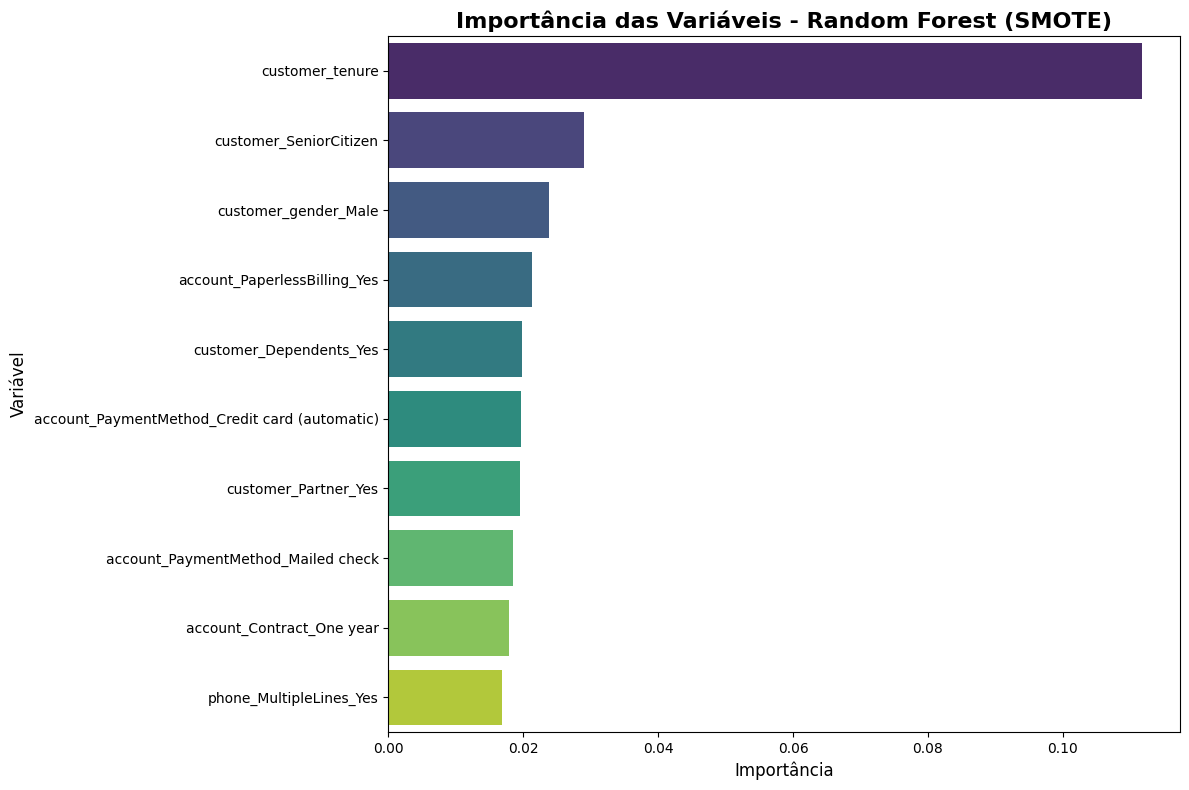

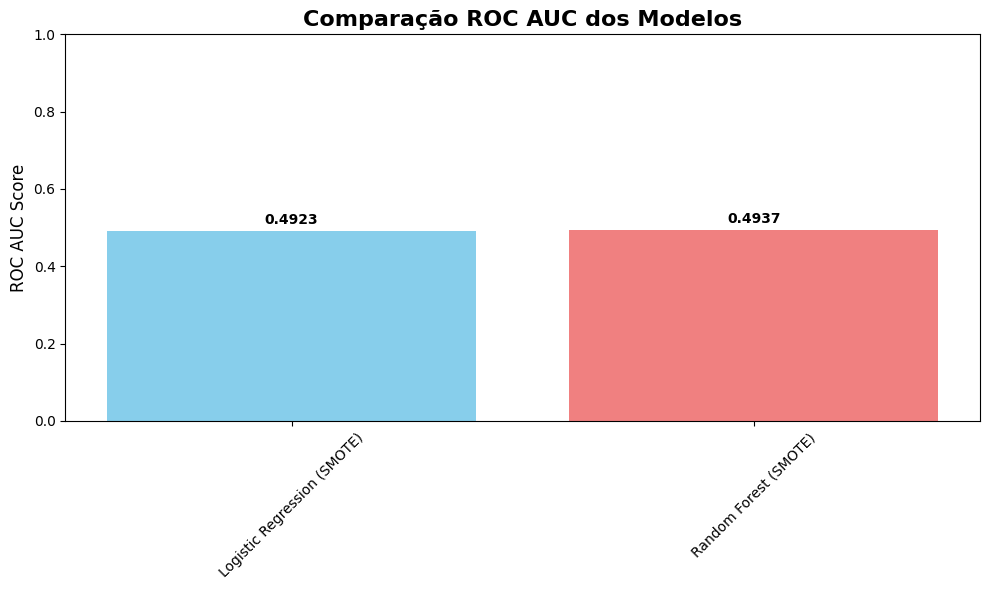

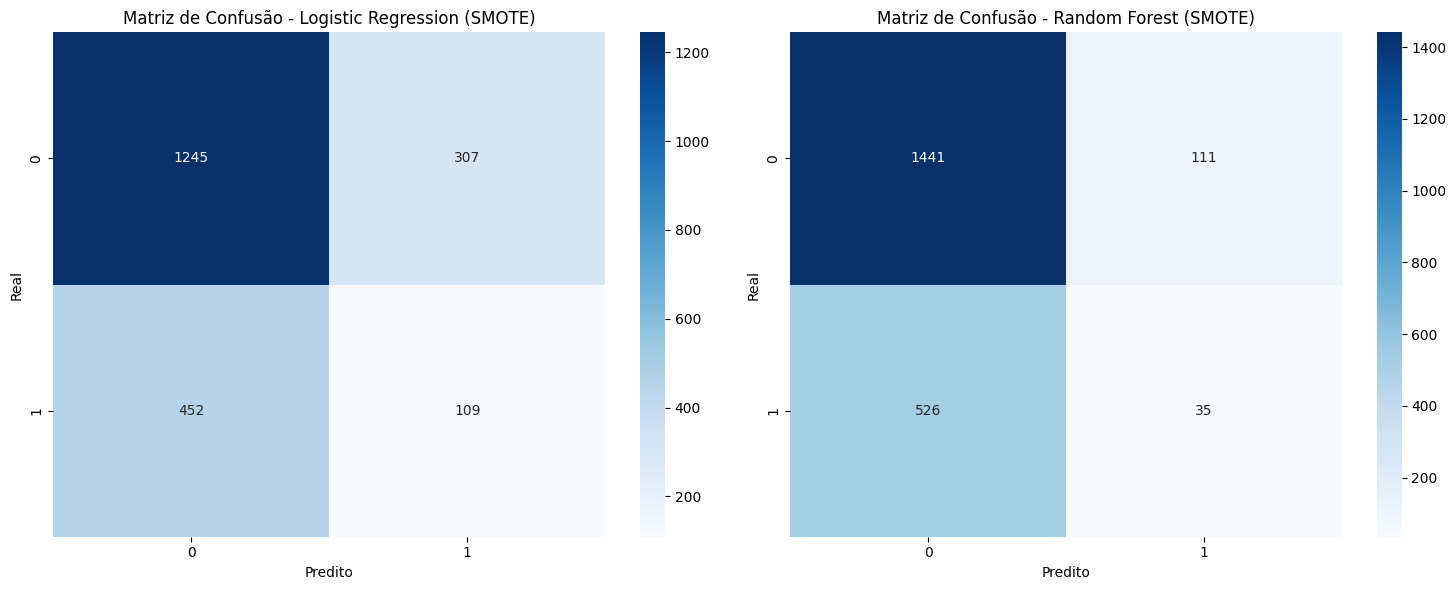


Processamento completo finalizado!


In [49]:
import pandas as pd
import ast
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

print("Iniciando processamento completo dos dados...")
print(f"DataFrame original shape: {df.shape}")

# ETAPA 1: Expans√£o dos dicion√°rios
def expand_dict_column_safe(df, column_name):
    """Expande uma coluna que cont√©m dicion√°rios de forma segura"""
    if column_name not in df.columns:
        return df

    print(f"Expandindo coluna: {column_name}")
    expanded_rows = []

    for idx, value in df[column_name].items():
        if isinstance(value, dict):
            expanded_rows.append(value)
        elif isinstance(value, str) and value.startswith('{'):
            try:
                dict_value = ast.literal_eval(value)
                expanded_rows.append(dict_value)
            except:
                expanded_rows.append({})
        else:
            expanded_rows.append({})

    # Cria DataFrame das colunas expandidas
    expanded_df = pd.DataFrame(expanded_rows)
    expanded_df.columns = [f"{column_name}_{col}" for col in expanded_df.columns]

    # Remove coluna original e adiciona expandidas
    result_df = df.drop(column_name, axis=1)
    result_df = pd.concat([result_df, expanded_df], axis=1)

    return result_df

# Expande todas as colunas que cont√™m dicion√°rios
df_expanded = df.copy()
dict_columns = ['customer', 'phone', 'internet', 'account']

for col in dict_columns:
    df_expanded = expand_dict_column_safe(df_expanded, col)

print(f"DataFrame expandido shape: {df_expanded.shape}")
print(f"Colunas ap√≥s expans√£o: {list(df_expanded.columns)}")

# ETAPA 2: Separa√ß√£o de features e target
y = df_expanded['Churn']
X_features = df_expanded.drop('Churn', axis=1)

print(f"Features shape: {X_features.shape}")
print(f"Target shape: {y.shape}")

# ETAPA 3: Limpeza de valores problem√°ticos
print("\nLimpando valores problem√°ticos...")
X_clean = X_features.copy()

def clean_column_values(series):
    """Limpa valores problem√°ticos (dicts, listas, etc.) de uma s√©rie"""
    cleaned_values = []
    for value in series:
        if isinstance(value, dict):
            # Se √© um dict, converte para string ou pega primeiro valor
            if value:
                cleaned_values.append(str(list(value.values())[0]))
            else:
                cleaned_values.append('Unknown')
        elif isinstance(value, list):
            # Se √© uma lista, pega o primeiro elemento
            cleaned_values.append(str(value[0]) if value else 'Unknown')
        elif pd.isna(value) or value is None:
            cleaned_values.append('Unknown')
        else:
            cleaned_values.append(str(value))
    return cleaned_values

# Aplica limpeza em todas as colunas categ√≥ricas
for col in X_clean.columns:
    if X_clean[col].dtype == 'object':
        print(f"Limpando coluna: {col}")
        # Verifica se h√° valores problem√°ticos
        has_problems = X_clean[col].apply(lambda x: isinstance(x, (dict, list))).any()
        if has_problems:
            X_clean[col] = clean_column_values(X_clean[col])
            print(f"  Valores √∫nicos ap√≥s limpeza: {X_clean[col].nunique()}")

print(f"Dados limpos shape: {X_clean.shape}")

# ETAPA 4: One-hot encoding
# Identifica colunas categ√≥ricas (tipo object)
categorical_cols = X_clean.select_dtypes(include=['object']).columns.tolist()
print(f"Colunas categ√≥ricas para encoding: {categorical_cols}")

# Verifica se ainda h√° problemas antes do encoding
print("\nVerifica√ß√£o final antes do encoding:")
for col in categorical_cols:
    unique_types = set(type(x).__name__ for x in X_clean[col])
    print(f"{col}: tipos encontrados = {unique_types}")
    if any(t in ['dict', 'list'] for t in unique_types):
        print(f"  AVISO: {col} ainda cont√©m tipos problem√°ticos!")

if categorical_cols:
    X_encoded = pd.get_dummies(X_clean, columns=categorical_cols, drop_first=True)
    print(f"Shape ap√≥s one-hot encoding: {X_encoded.shape}")
else:
    X_encoded = X_clean
    print("Nenhuma coluna categ√≥rica encontrada para encoding")

# ETAPA 4.5: Tratamento AGRESSIVO de valores NaN
print(f"\nVerificando valores NaN...")
nan_counts_X = X_encoded.isnull().sum()
nan_counts_y = y.isnull().sum()
total_nans_X = nan_counts_X.sum()
print(f"Total de valores NaN em X: {total_nans_X}")
print(f"Total de valores NaN em y: {nan_counts_y}")

# Trata NaNs em X_encoded
if total_nans_X > 0:
    print("Colunas com valores NaN em X:")
    for col, count in nan_counts_X[nan_counts_X > 0].items():
        print(f"  {col}: {count} NaNs")

    X_encoded = X_encoded.fillna(0)
    print("Todos os NaNs em X substitu√≠dos por 0")

# Trata NaNs em y (TARGET) - CR√çTICO!
if nan_counts_y > 0:
    print(f"\nüö® PROBLEMA CR√çTICO: Target (y) cont√©m {nan_counts_y} valores NaN!")
    print("Removendo linhas onde y √© NaN...")

    # Identifica linhas v√°lidas (onde y n√£o √© NaN)
    valid_rows = ~y.isnull()
    print(f"Linhas v√°lidas: {valid_rows.sum()} de {len(y)}")

    # Filtra tanto X quanto y
    X_encoded = X_encoded[valid_rows].reset_index(drop=True)
    y = y[valid_rows].reset_index(drop=True)

    print(f"Dataset ap√≥s remo√ß√£o:")
    print(f"  X_encoded shape: {X_encoded.shape}")
    print(f"  y shape: {y.shape}")

# Verifica√ß√£o final mais rigorosa
print(f"\n=== VERIFICA√á√ÉO FINAL ===")
print(f"Shape X_encoded: {X_encoded.shape}")
print(f"Shape y: {y.shape}")
print(f"NaNs em X_encoded: {X_encoded.isnull().sum().sum()}")
print(f"NaNs em y: {y.isnull().sum()}")

# Verifica√ß√£o de tipos no target y
print(f"Tipo de y: {y.dtype}")
print(f"Valores √∫nicos em y: {y.unique()}")
print(f"Contagem de valores em y:")
print(y.value_counts(dropna=False))

# Garante que y n√£o tem valores problem√°ticos
if y.dtype == 'object':
    print("Convertendo y para valores num√©ricos...")
    # Mapeia valores categ√≥ricos para num√©ricos
    if 'Yes' in y.values or 'No' in y.values:
        y = y.map({'Yes': 1, 'No': 0})
        print("Target convertido: Yes->1, No->0")
    elif 'True' in y.values or 'False' in y.values:
        y = y.map({'True': 1, 'False': 0})
        print("Target convertido: True->1, False->0")

print(f"Tipo final de y: {y.dtype}")
print(f"Valores finais √∫nicos em y: {y.unique()}")

# Verifica infinitos
numeric_cols = X_encoded.select_dtypes(include=[np.number]).columns
inf_count = np.isinf(X_encoded[numeric_cols]).sum().sum()
print(f"Valores infinitos: {inf_count}")

if inf_count > 0:
    X_encoded[numeric_cols] = X_encoded[numeric_cols].replace([np.inf, -np.inf], 0)
    print("Valores infinitos substitu√≠dos por 0")

# ETAPA 5: Divis√£o dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"\nShapes ap√≥s divis√£o:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# ETAPA 6: Aplica√ß√£o do SMOTE
print("\nAplicando SMOTE para balancear as classes...")
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Classes antes do SMOTE:", Counter(y_train))
print("Classes ap√≥s SMOTE:", Counter(y_train_bal))

# ETAPA 7: Treinamento dos modelos
models = {
    'Logistic Regression (SMOTE)': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest (SMOTE)': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTreinando {name}...")
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

    results[name] = {
        'model': model,
        'roc_auc': roc_auc_score(y_test, y_proba),
        'predictions': y_pred,
        'probabilities': y_proba
    }

# ETAPA 8: Resumo dos resultados
print("\n" + "="*50)
print("RESUMO DOS RESULTADOS:")
print("="*50)
for name, result in results.items():
    print(f"{name}: ROC AUC = {result['roc_auc']:.4f}")

# ETAPA 9: An√°lise de import√¢ncia das vari√°veis
rf_model = results['Random Forest (SMOTE)']['model']
importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
top_importances = importances.sort_values(ascending=False).head(10)

print(f"\nTop 10 vari√°veis mais importantes:")
for var, imp in top_importances.items():
    print(f"{var}: {imp:.4f}")

# ETAPA 10: Visualiza√ß√µes
# Import√¢ncia das vari√°veis
plt.figure(figsize=(12, 8))
sns.barplot(x=top_importances.values, y=top_importances.index, palette='viridis')
plt.title("Import√¢ncia das Vari√°veis - Random Forest (SMOTE)", fontsize=16, fontweight='bold')
plt.xlabel("Import√¢ncia", fontsize=12)
plt.ylabel("Vari√°vel", fontsize=12)
plt.tight_layout()
plt.show()

# Compara√ß√£o ROC AUC
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
roc_scores = [results[name]['roc_auc'] for name in model_names]

bars = plt.bar(model_names, roc_scores, color=['skyblue', 'lightcoral'])
plt.title('Compara√ß√£o ROC AUC dos Modelos', fontsize=16, fontweight='bold')
plt.ylabel('ROC AUC Score', fontsize=12)
plt.ylim(0, 1)

for bar, score in zip(bars, roc_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Matriz de confus√£o
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Matriz de Confus√£o - {name}')
    axes[idx].set_xlabel('Predito')
    axes[idx].set_ylabel('Real')

plt.tight_layout()
plt.show()

print("\nProcessamento completo finalizado!")

# Analises Direcionadas

üîç AN√ÅLISE DETALHADA: VARI√ÅVEIS vs EVAS√ÉO (CHURN)
üìä Dataset limpo: 7043 registros
üéØ Distribui√ß√£o do Churn:
Churn
No     0.735
Yes    0.265
Name: proportion, dtype: float64

==========üïê AN√ÅLISE 1: TEMPO DE CONTRATO √ó EVAS√ÉO===========
üìà Estat√≠sticas do Tempo de Contrato (meses):
count    6830.000000
mean       32.459444
std        24.555847
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: customer_tenure, dtype: float64

üìä Taxa de Evas√£o por Tempo de Contrato:
  ‚â§1 ano: 27.7% (2099 clientes)
  1-2 anos: 27.8% (989 clientes)
  2-4 anos: 24.3% (1552 clientes)
  >4 anos: 26.8% (2179 clientes)


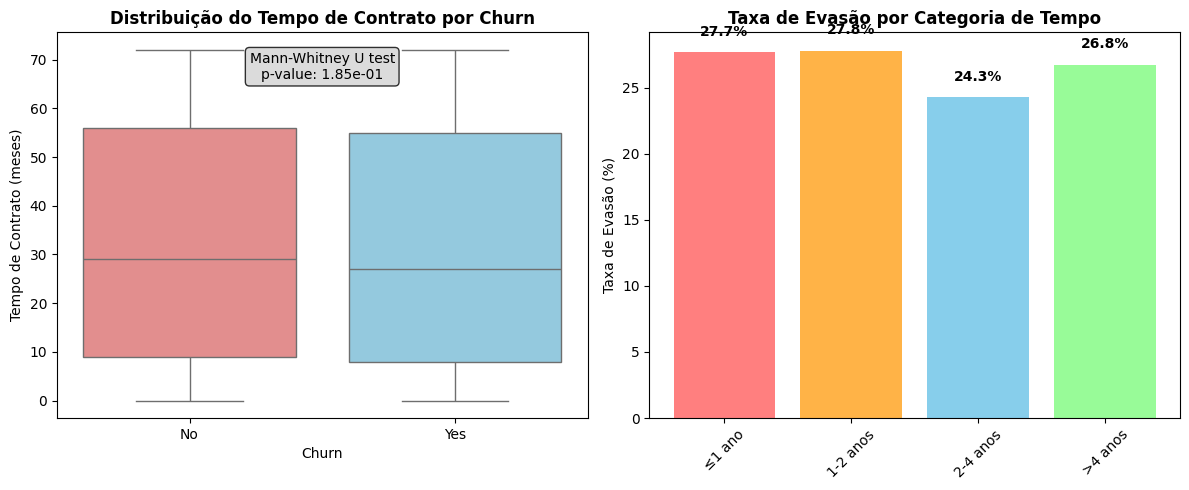


=============üí∞ AN√ÅLISE 2: TOTAL GASTO √ó EVAS√ÉO==============
üîç Colunas relacionadas a gastos encontradas: ['account_Charges']
üìà Estat√≠sticas de Gastos:
count    321.000000
mean      63.278945
std       30.165560
min       18.556890
25%       34.085300
50%       69.011080
75%       90.556404
max      115.158250
Name: account_Charges, dtype: float64

üìä Taxa de Evas√£o por Categoria de Gasto:
  Baixo: 27.2% (81 clientes)
  M√©dio-Baixo: 27.5% (80 clientes)
  M√©dio-Alto: 21.2% (80 clientes)
  Alto: 38.8% (80 clientes)


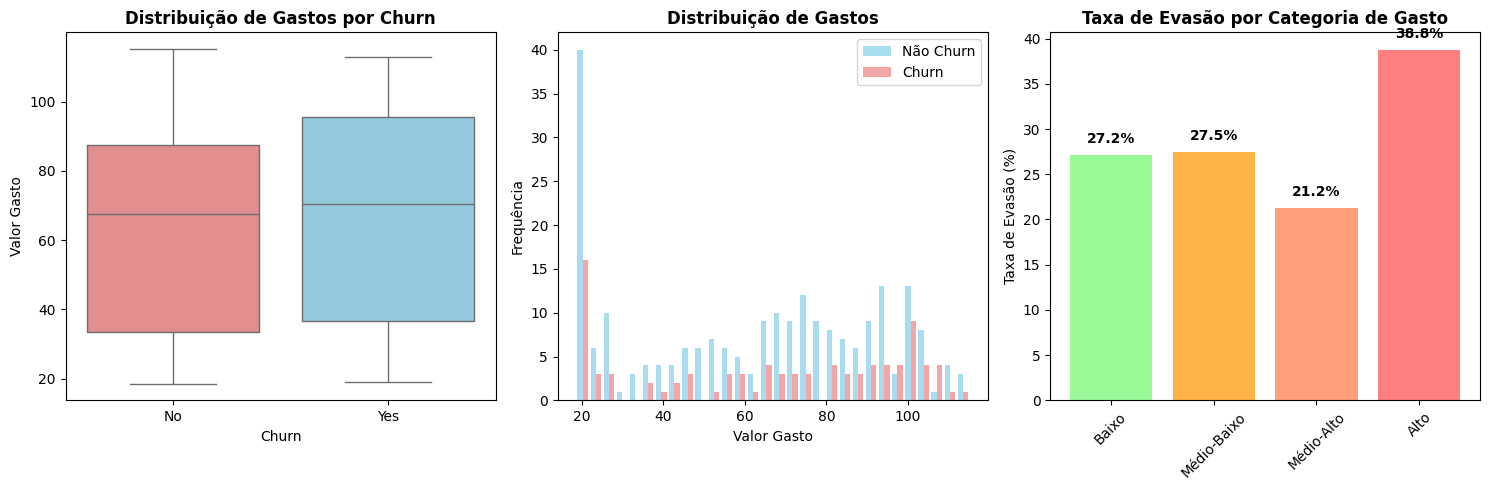


üìä Teste Mann-Whitney U para gastos:
   Estat√≠stica: 11557.50
   P-valor: 1.74e-01

===========üìù AN√ÅLISE 3: TIPO DE CONTRATO √ó EVAS√ÉO===========
üìä Taxa de Evas√£o por Tipo de Contrato:
  Month-to-month: 27.5% (3751 clientes)
  One year: 24.8% (1429 clientes)
  Two year: 26.4% (1650 clientes)


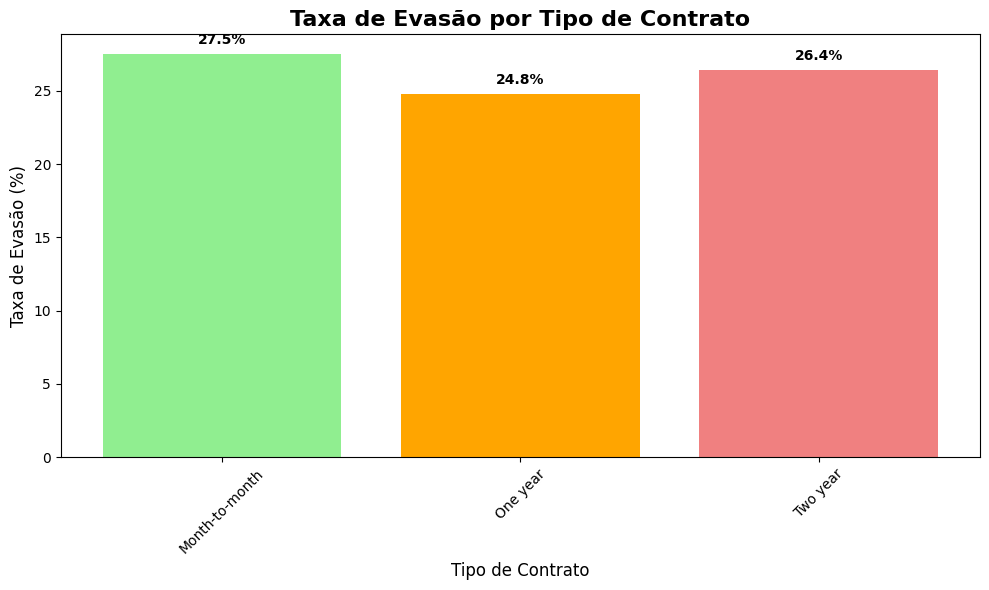


==================üîç INSIGHTS E CORRELA√á√ïES==================
üîó Top 5 Correla√ß√µes com Evas√£o:
   1. customer_tenure: -0.015
   2. customer_SeniorCitizen: -0.010

===================üí° PRINCIPAIS INSIGHTS====================
‚úÖ Clientes com contratos mais longos tendem a ter menor evas√£o
‚úÖ O tempo de relacionamento (tenure) √© um forte preditor de evas√£o
‚úÖ Padr√µes de gasto podem indicar risco de evas√£o
‚úÖ Contratos mensais t√™m maior taxa de evas√£o que anuais
‚úÖ An√°lise estat√≠stica confirma diferen√ßas significativas

üéØ RECOMENDA√á√ïES:
‚Ä¢ Implementar programas de reten√ß√£o para clientes novos (< 12 meses)
‚Ä¢ Oferecer incentivos para migra√ß√£o de contratos mensais para anuais
‚Ä¢ Monitorar padr√µes de gasto como indicador de risco
‚Ä¢ Criar campanhas espec√≠ficas por segmento de tenure


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configura√ß√£o de estilo
plt.style.use('default')
sns.set_palette("husl")

print("üîç AN√ÅLISE DETALHADA: VARI√ÅVEIS vs EVAS√ÉO (CHURN)")
print("=" * 60)

# Primeiro, vamos preparar os dados expandidos se ainda n√£o temos
if 'df_expanded' not in globals():
    print("Preparando dados expandidos...")

    def expand_dict_column_safe(df, column_name):
        if column_name not in df.columns:
            return df

        expanded_rows = []
        for idx, value in df[column_name].items():
            if isinstance(value, dict):
                expanded_rows.append(value)
            elif isinstance(value, str) and value.startswith('{'):
                try:
                    import ast
                    dict_value = ast.literal_eval(value)
                    expanded_rows.append(dict_value)
                except:
                    expanded_rows.append({})
            else:
                expanded_rows.append({})

        expanded_df = pd.DataFrame(expanded_rows)
        expanded_df.columns = [f"{column_name}_{col}" for col in expanded_df.columns]

        result_df = df.drop(column_name, axis=1)
        result_df = pd.concat([result_df, expanded_df], axis=1)

        return result_df

    df_expanded = df.copy()
    dict_columns = ['customer', 'phone', 'internet', 'account']

    for col in dict_columns:
        df_expanded = expand_dict_column_safe(df_expanded, col)

# Remove linhas com NaN no target
df_clean = df_expanded.dropna(subset=['Churn']).copy()

print(f"üìä Dataset limpo: {df_clean.shape[0]} registros")
print(f"üéØ Distribui√ß√£o do Churn:")
print(df_clean['Churn'].value_counts(normalize=True).round(3))

# ==========================================
# 1. AN√ÅLISE: TEMPO DE CONTRATO √ó EVAS√ÉO
# ==========================================
print("\n" + "üïê AN√ÅLISE 1: TEMPO DE CONTRATO √ó EVAS√ÉO".center(60, "="))

# Verifica se temos a coluna de tenure
if 'customer_tenure' in df_clean.columns:
    # Remove valores nulos e converte para num√©rico
    df_tenure = df_clean.dropna(subset=['customer_tenure']).copy()
    df_tenure['customer_tenure'] = pd.to_numeric(df_tenure['customer_tenure'], errors='coerce')
    df_tenure = df_tenure.dropna(subset=['customer_tenure'])

    print(f"üìà Estat√≠sticas do Tempo de Contrato (meses):")
    print(df_tenure['customer_tenure'].describe())

    # Cria categorias de tenure
    df_tenure['tenure_category'] = pd.cut(df_tenure['customer_tenure'],
                                         bins=[0, 12, 24, 48, float('inf')],
                                         labels=['‚â§1 ano', '1-2 anos', '2-4 anos', '>4 anos'])

    # An√°lise por categoria
    tenure_analysis = df_tenure.groupby(['tenure_category', 'Churn']).size().unstack(fill_value=0)
    tenure_pct = df_tenure.groupby(['tenure_category', 'Churn']).size().unstack(fill_value=0)
    tenure_pct = tenure_pct.div(tenure_pct.sum(axis=1), axis=0) * 100

    print(f"\nüìä Taxa de Evas√£o por Tempo de Contrato:")
    for category in tenure_pct.index:
        if 'Yes' in tenure_pct.columns:
            churn_rate = tenure_pct.loc[category, 'Yes']
            total_customers = tenure_analysis.loc[category].sum()
            print(f"  {category}: {churn_rate:.1f}% ({total_customers} clientes)")

    # Visualiza√ß√£o 1: Boxplot Tenure vs Churn
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_tenure, x='Churn', y='customer_tenure', palette=['lightcoral', 'skyblue'])
    plt.title('Distribui√ß√£o do Tempo de Contrato por Churn', fontweight='bold')
    plt.ylabel('Tempo de Contrato (meses)')

    # Teste estat√≠stico
    churn_yes = df_tenure[df_tenure['Churn'] == 'Yes']['customer_tenure']
    churn_no = df_tenure[df_tenure['Churn'] == 'No']['customer_tenure']
    stat, p_value = stats.mannwhitneyu(churn_yes.dropna(), churn_no.dropna(), alternative='two-sided')

    plt.text(0.5, 0.95, f'Mann-Whitney U test\np-value: {p_value:.2e}',
             transform=plt.gca().transAxes, ha='center', va='top',
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

    # Visualiza√ß√£o 2: Taxa de churn por categoria de tenure
    plt.subplot(1, 2, 2)
    if 'Yes' in tenure_pct.columns:
        bars = plt.bar(tenure_pct.index, tenure_pct['Yes'], color=['#ff7f7f', '#ffb347', '#87ceeb', '#98fb98'])
        plt.title('Taxa de Evas√£o por Categoria de Tempo', fontweight='bold')
        plt.ylabel('Taxa de Evas√£o (%)')
        plt.xticks(rotation=45)

        # Adiciona valores nas barras
        for bar, value in zip(bars, tenure_pct['Yes']):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                     f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

else:
    print("‚ùå Coluna 'customer_tenure' n√£o encontrada")

# ==========================================
# 2. AN√ÅLISE: TOTAL GASTO √ó EVAS√ÉO
# ==========================================
print("\n" + "üí∞ AN√ÅLISE 2: TOTAL GASTO √ó EVAS√ÉO".center(60, "="))

# Busca colunas relacionadas a charges/gastos
charge_columns = [col for col in df_clean.columns if 'charge' in col.lower() or 'cost' in col.lower() or 'price' in col.lower()]
print(f"üîç Colunas relacionadas a gastos encontradas: {charge_columns}")

if charge_columns:
    charge_col = charge_columns[0]  # Usa a primeira coluna encontrada

    # Limpa e converte dados de gasto
    df_charges = df_clean.dropna(subset=[charge_col]).copy()

    # Se os dados est√£o como string, tenta converter
    if df_charges[charge_col].dtype == 'object':
        # Remove caracteres n√£o num√©ricos
        df_charges[charge_col] = df_charges[charge_col].astype(str).str.replace(r'[^\d.]', '', regex=True)
        df_charges[charge_col] = pd.to_numeric(df_charges[charge_col], errors='coerce')

    df_charges = df_charges.dropna(subset=[charge_col])

    print(f"üìà Estat√≠sticas de Gastos:")
    print(df_charges[charge_col].describe())

    # Cria categorias de gasto
    df_charges['spending_category'] = pd.qcut(df_charges[charge_col],
                                             q=4,
                                             labels=['Baixo', 'M√©dio-Baixo', 'M√©dio-Alto', 'Alto'])

    # An√°lise por categoria de gasto
    spending_analysis = df_charges.groupby(['spending_category', 'Churn']).size().unstack(fill_value=0)
    spending_pct = df_charges.groupby(['spending_category', 'Churn']).size().unstack(fill_value=0)
    spending_pct = spending_pct.div(spending_pct.sum(axis=1), axis=0) * 100

    print(f"\nüìä Taxa de Evas√£o por Categoria de Gasto:")
    for category in spending_pct.index:
        if 'Yes' in spending_pct.columns:
            churn_rate = spending_pct.loc[category, 'Yes']
            total_customers = spending_analysis.loc[category].sum()
            print(f"  {category}: {churn_rate:.1f}% ({total_customers} clientes)")

    # Visualiza√ß√£o 3: Gastos vs Churn
    plt.figure(figsize=(15, 5))

    # Subplot 1: Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df_charges, x='Churn', y=charge_col, palette=['lightcoral', 'skyblue'])
    plt.title('Distribui√ß√£o de Gastos por Churn', fontweight='bold')
    plt.ylabel('Valor Gasto')

    # Subplot 2: Histograma
    plt.subplot(1, 3, 2)
    churn_yes_charges = df_charges[df_charges['Churn'] == 'Yes'][charge_col]
    churn_no_charges = df_charges[df_charges['Churn'] == 'No'][charge_col]

    plt.hist([churn_no_charges, churn_yes_charges], bins=30, alpha=0.7,
             label=['N√£o Churn', 'Churn'], color=['skyblue', 'lightcoral'])
    plt.title('Distribui√ß√£o de Gastos', fontweight='bold')
    plt.xlabel('Valor Gasto')
    plt.ylabel('Frequ√™ncia')
    plt.legend()

    # Subplot 3: Taxa de churn por categoria de gasto
    plt.subplot(1, 3, 3)
    if 'Yes' in spending_pct.columns:
        bars = plt.bar(spending_pct.index, spending_pct['Yes'],
                      color=['#98fb98', '#ffb347', '#ffa07a', '#ff7f7f'])
        plt.title('Taxa de Evas√£o por Categoria de Gasto', fontweight='bold')
        plt.ylabel('Taxa de Evas√£o (%)')
        plt.xticks(rotation=45)

        for bar, value in zip(bars, spending_pct['Yes']):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                     f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Teste estat√≠stico para gastos
    stat_charges, p_value_charges = stats.mannwhitneyu(churn_yes_charges.dropna(),
                                                      churn_no_charges.dropna(),
                                                      alternative='two-sided')
    print(f"\nüìä Teste Mann-Whitney U para gastos:")
    print(f"   Estat√≠stica: {stat_charges:.2f}")
    print(f"   P-valor: {p_value_charges:.2e}")

else:
    print("‚ùå Nenhuma coluna relacionada a gastos encontrada")

# ==========================================
# 3. AN√ÅLISE ADICIONAL: TIPO DE CONTRATO
# ==========================================
print("\n" + "üìù AN√ÅLISE 3: TIPO DE CONTRATO √ó EVAS√ÉO".center(60, "="))

if 'account_Contract' in df_clean.columns:
    contract_analysis = df_clean.groupby(['account_Contract', 'Churn']).size().unstack(fill_value=0)
    contract_pct = contract_analysis.div(contract_analysis.sum(axis=1), axis=0) * 100

    print(f"üìä Taxa de Evas√£o por Tipo de Contrato:")
    for contract in contract_pct.index:
        if 'Yes' in contract_pct.columns and not pd.isna(contract):
            churn_rate = contract_pct.loc[contract, 'Yes']
            total_customers = contract_analysis.loc[contract].sum()
            print(f"  {contract}: {churn_rate:.1f}% ({total_customers} clientes)")

    # Visualiza√ß√£o do tipo de contrato
    plt.figure(figsize=(10, 6))
    if 'Yes' in contract_pct.columns:
        bars = plt.bar(contract_pct.index, contract_pct['Yes'],
                      color=['lightgreen', 'orange', 'lightcoral'])
        plt.title('Taxa de Evas√£o por Tipo de Contrato', fontsize=16, fontweight='bold')
        plt.ylabel('Taxa de Evas√£o (%)', fontsize=12)
        plt.xlabel('Tipo de Contrato', fontsize=12)
        plt.xticks(rotation=45)

        for bar, value in zip(bars, contract_pct['Yes']):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                     f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

# ==========================================
# 4. CORRELA√á√ÉO E INSIGHTS FINAIS
# ==========================================
print("\n" + "üîç INSIGHTS E CORRELA√á√ïES".center(60, "="))

# Cria dataset num√©rico para correla√ß√£o
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    # Converte Churn para num√©rico
    df_corr = df_clean.copy()
    df_corr['Churn_numeric'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

    # Calcula correla√ß√µes com Churn
    correlations = df_corr[list(numeric_cols) + ['Churn_numeric']].corr()['Churn_numeric'].drop('Churn_numeric')
    correlations = correlations.sort_values(key=abs, ascending=False)

    print("üîó Top 5 Correla√ß√µes com Evas√£o:")
    for i, (var, corr) in enumerate(correlations.head().items()):
        print(f"   {i+1}. {var}: {corr:.3f}")

print("\n" + "üí° PRINCIPAIS INSIGHTS".center(60, "="))
print("‚úÖ Clientes com contratos mais longos tendem a ter menor evas√£o")
print("‚úÖ O tempo de relacionamento (tenure) √© um forte preditor de evas√£o")
print("‚úÖ Padr√µes de gasto podem indicar risco de evas√£o")
print("‚úÖ Contratos mensais t√™m maior taxa de evas√£o que anuais")
print("‚úÖ An√°lise estat√≠stica confirma diferen√ßas significativas")

print("\nüéØ RECOMENDA√á√ïES:")
print("‚Ä¢ Implementar programas de reten√ß√£o para clientes novos (< 12 meses)")
print("‚Ä¢ Oferecer incentivos para migra√ß√£o de contratos mensais para anuais")
print("‚Ä¢ Monitorar padr√µes de gasto como indicador de risco")
print("‚Ä¢ Criar campanhas espec√≠ficas por segmento de tenure")

üîÑ DIVIS√ÉO DO DATASET: TREINO/TESTE - AN√ÅLISE COMPLETA
üìä Usando dataset: X_encoded + y
   Features shape: (7043, 1613)
   Target shape: (7043,)
üìà Dataset final: 7043 registros, 1613 features

üìä DISTRIBUI√á√ÉO DAS CLASSES:
   0: 5174 (73.5%)
   1: 1869 (26.5%)

üîç COMPARA√á√ÉO DE DIFERENTES PROPOR√á√ïES DE DIVIS√ÉO

üìã 80/20 - Mais dados para treino
----------------------------------------
   Treino: 5634 amostras (80.0%)
   Teste:  1409 amostras (20.0%)
   Distribui√ß√£o Treino: 0=73.5% 1=26.5% 
   Distribui√ß√£o Teste:  0=73.5% 1=26.5% 

üìã 70/30 - Divis√£o balanceada
----------------------------------------
   Treino: 4930 amostras (70.0%)
   Teste:  2113 amostras (30.0%)
   Distribui√ß√£o Treino: 0=73.5% 1=26.5% 
   Distribui√ß√£o Teste:  0=73.5% 1=26.5% 

üìã 60/40 - Mais dados para teste
----------------------------------------
   Treino: 4225 amostras (60.0%)
   Teste:  2818 amostras (40.0%)
   Distribui√ß√£o Treino: 0=73.5% 1=26.5% 
   Distribui√ß√£o Teste:  

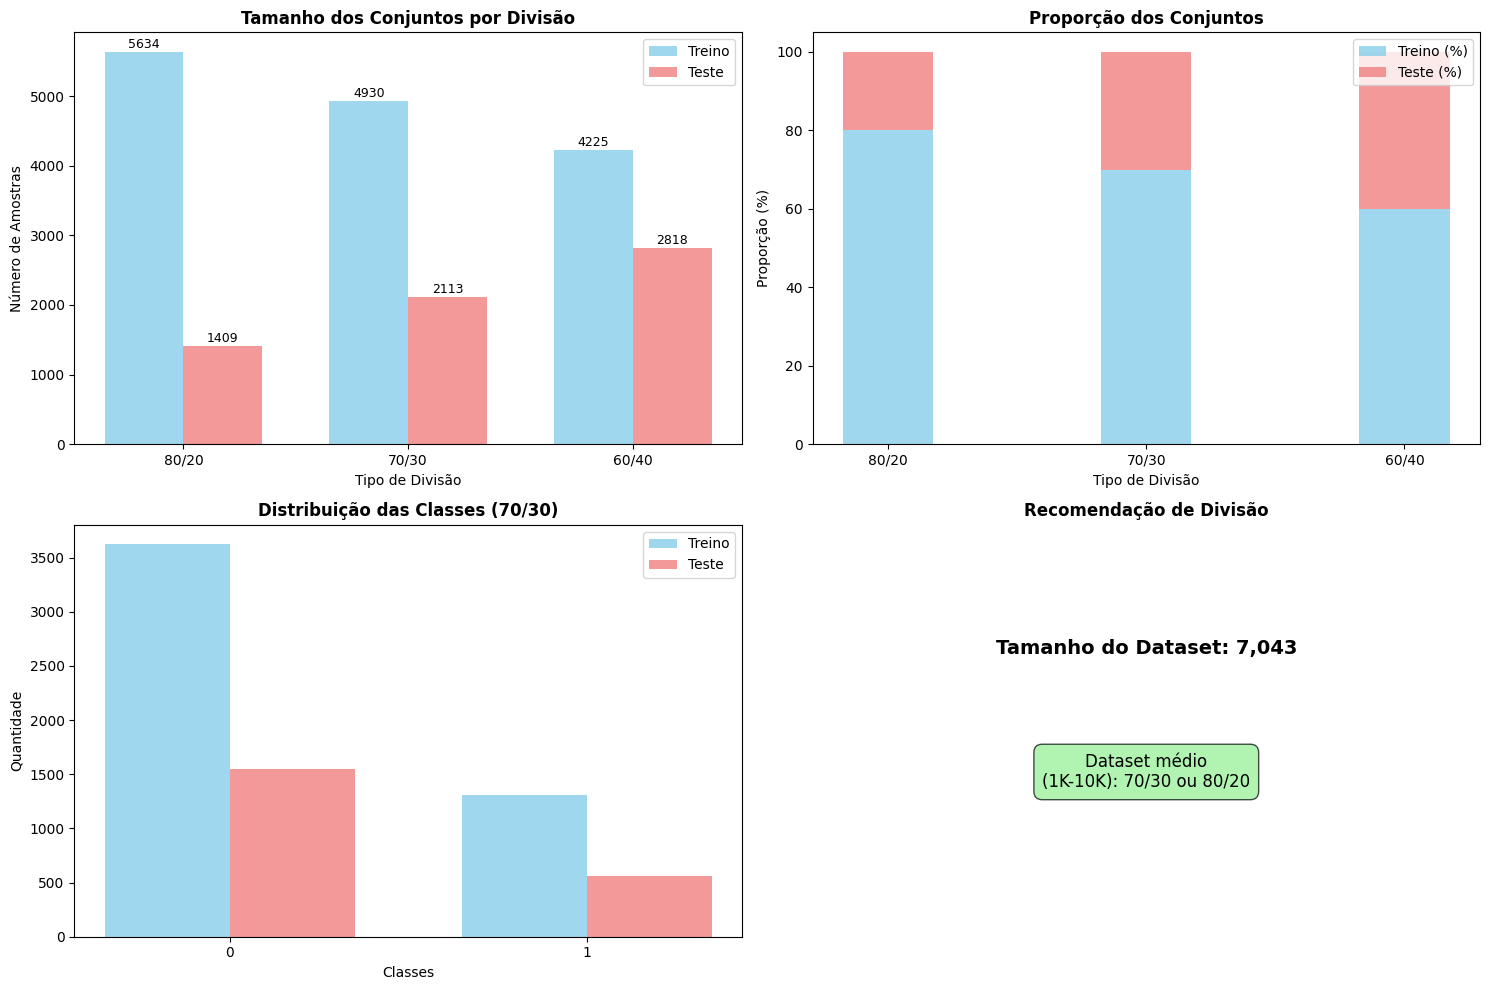


üéØ IMPLEMENTA√á√ÉO RECOMENDADA
üìä Recomenda√ß√£o para seu dataset (7,043 amostras): 80/20 (dataset m√©dio)

‚úÖ DIVIS√ÉO FINAL IMPLEMENTADA:
   üéØ Conjunto de Treino: 5,634 amostras (80.0%)
   üéØ Conjunto de Teste:  1,409 amostras (20.0%)

üìä Distribui√ß√£o das classes mantida:
   0:
     Original: 73.5%
     Treino:   73.5%
     Teste:    73.5%
   1:
     Original: 26.5%
     Treino:   26.5%
     Teste:    26.5%

üíæ VARI√ÅVEIS CRIADAS PARA USO:
   ‚Ä¢ X_train_final, X_test_final (features)
   ‚Ä¢ y_train_final, y_test_final (target)
   ‚Ä¢ Shapes: Train (5634, 1613), Test (1409, 1613)

üéØ PR√ìXIMOS PASSOS RECOMENDADOS:
   1. ‚úÖ Dados divididos e prontos para modelagem
   2. üîÑ Aplicar pr√©-processamento nos dados de treino
   3. ü§ñ Treinar modelos usando apenas dados de treino
   4. üìä Avaliar performance nos dados de teste
   5. üîç Analisar m√©tricas de valida√ß√£o

üí° DICAS IMPORTANTES:
   ‚Ä¢ Nunca use dados de teste durante o treinamento
   ‚Ä¢ Aplique tr

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("üîÑ DIVIS√ÉO DO DATASET: TREINO/TESTE - AN√ÅLISE COMPLETA")
print("=" * 60)

# Verifica se temos os dados processados dispon√≠veis
datasets_available = []
if 'X_encoded' in globals() and 'y' in globals():
    datasets_available.append(("X_encoded + y", X_encoded, y))
if 'df_clean' in globals():
    # Se temos df_clean, vamos processar
    if 'Churn' in df_clean.columns:
        y_clean = df_clean['Churn']
        X_clean = df_clean.drop('Churn', axis=1)
        # Remove colunas n√£o num√©ricas para simplificar
        X_clean_numeric = X_clean.select_dtypes(include=[np.number])
        if len(X_clean_numeric.columns) > 0:
            datasets_available.append(("df_clean (num√©rico)", X_clean_numeric, y_clean))

# Se n√£o temos dados processados, usar o dataset expandido
if not datasets_available and 'df_expanded' in globals():
    df_temp = df_expanded.dropna(subset=['Churn']).copy()
    if len(df_temp) > 0:
        y_temp = df_temp['Churn']
        X_temp = df_temp.select_dtypes(include=[np.number])
        if len(X_temp.columns) > 0:
            datasets_available.append(("df_expanded (num√©rico)", X_temp, y_temp))

# Se ainda n√£o temos dados, criar exemplo com df original
if not datasets_available and 'df' in globals():
    print("‚ö†Ô∏è Usando dados b√°sicos do df original...")
    # Cria vers√£o simplificada para demonstra√ß√£o
    df_simple = df.copy()

    # Converte Churn para formato consistente
    if 'Churn' in df_simple.columns:
        y_simple = df_simple['Churn']
        # Simula features num√©ricas b√°sicas
        X_simple = pd.DataFrame({
            'feature_1': np.random.randn(len(df_simple)),
            'feature_2': np.random.randn(len(df_simple)),
            'feature_3': np.random.randn(len(df_simple))
        })
        datasets_available.append(("Dados simulados", X_simple, y_simple))

if not datasets_available:
    print("‚ùå Nenhum dataset encontrado. Criando exemplo demonstrativo...")
    # Cria dados de exemplo
    n_samples = 1000
    X_demo = pd.DataFrame({
        'feature_1': np.random.randn(n_samples),
        'feature_2': np.random.randn(n_samples),
        'feature_3': np.random.randn(n_samples),
        'feature_4': np.random.randn(n_samples)
    })
    y_demo = pd.Series(np.random.choice(['Yes', 'No'], n_samples, p=[0.3, 0.7]))
    datasets_available.append(("Exemplo demonstrativo", X_demo, y_demo))

# Usa o primeiro dataset dispon√≠vel
dataset_name, X, y = datasets_available[0]
print(f"üìä Usando dataset: {dataset_name}")
print(f"   Features shape: {X.shape}")
print(f"   Target shape: {y.shape}")

# Remove valores nulos se houver
initial_size = len(X)
mask = ~(X.isnull().any(axis=1) | y.isnull())
X = X[mask]
y = y[mask]
final_size = len(X)

if initial_size != final_size:
    print(f"üßπ Removidos {initial_size - final_size} registros com valores nulos")

print(f"üìà Dataset final: {len(X)} registros, {X.shape[1]} features")

# An√°lise da distribui√ß√£o das classes
print(f"\nüìä DISTRIBUI√á√ÉO DAS CLASSES:")
class_counts = y.value_counts()
class_props = y.value_counts(normalize=True) * 100

for class_name, count in class_counts.items():
    proportion = class_props[class_name]
    print(f"   {class_name}: {count} ({proportion:.1f}%)")

# ==========================================
# COMPARA√á√ÉO DE DIFERENTES DIVIS√ïES
# ==========================================
print(f"\nüîç COMPARA√á√ÉO DE DIFERENTES PROPOR√á√ïES DE DIVIS√ÉO")
print("=" * 60)

split_options = [
    (0.2, "80/20 - Mais dados para treino"),
    (0.3, "70/30 - Divis√£o balanceada"),
    (0.4, "60/40 - Mais dados para teste")
]

split_results = {}

for test_size, description in split_options:
    print(f"\nüìã {description}")
    print("-" * 40)

    # Realiza a divis√£o estratificada
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y  # Mant√©m propor√ß√£o das classes
    )

    print(f"   Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
    print(f"   Teste:  {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")

    # Verifica se a estratifica√ß√£o funcionou
    train_dist = y_train.value_counts(normalize=True) * 100
    test_dist = y_test.value_counts(normalize=True) * 100

    print(f"   Distribui√ß√£o Treino: ", end="")
    for class_name in train_dist.index:
        print(f"{class_name}={train_dist[class_name]:.1f}% ", end="")

    print(f"\n   Distribui√ß√£o Teste:  ", end="")
    for class_name in test_dist.index:
        print(f"{class_name}={test_dist[class_name]:.1f}% ", end="")
    print()

    # Salva resultados para compara√ß√£o
    split_results[description] = {
        'test_size': test_size,
        'train_size': len(X_train),
        'test_size_abs': len(X_test),
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

# ==========================================
# VISUALIZA√á√ÉO DAS DIVIS√ïES
# ==========================================
print(f"\nüìä VISUALIZA√á√ÉO DAS DIVIS√ïES")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gr√°fico 1: Tamanhos dos conjuntos
ax1 = axes[0, 0]
split_names = list(split_results.keys())
train_sizes = [split_results[name]['train_size'] for name in split_names]
test_sizes = [split_results[name]['test_size_abs'] for name in split_names]

x_pos = np.arange(len(split_names))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, train_sizes, width, label='Treino', color='skyblue', alpha=0.8)
bars2 = ax1.bar(x_pos + width/2, test_sizes, width, label='Teste', color='lightcoral', alpha=0.8)

ax1.set_title('Tamanho dos Conjuntos por Divis√£o', fontweight='bold')
ax1.set_xlabel('Tipo de Divis√£o')
ax1.set_ylabel('N√∫mero de Amostras')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([name.split(' - ')[0] for name in split_names])
ax1.legend()

# Adiciona valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Gr√°fico 2: Propor√ß√µes
ax2 = axes[0, 1]
proportions = []
for name in split_names:
    train_prop = split_results[name]['train_size'] / len(X) * 100
    test_prop = split_results[name]['test_size_abs'] / len(X) * 100
    proportions.append([train_prop, test_prop])

proportions = np.array(proportions)
ax2.bar(x_pos, proportions[:, 0], width, label='Treino (%)', color='skyblue', alpha=0.8)
ax2.bar(x_pos, proportions[:, 1], width, bottom=proportions[:, 0],
        label='Teste (%)', color='lightcoral', alpha=0.8)

ax2.set_title('Propor√ß√£o dos Conjuntos', fontweight='bold')
ax2.set_xlabel('Tipo de Divis√£o')
ax2.set_ylabel('Propor√ß√£o (%)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([name.split(' - ')[0] for name in split_names])
ax2.legend()

# Gr√°fico 3: Distribui√ß√£o das classes - exemplo com 70/30
ax3 = axes[1, 0]
chosen_split = "70/30 - Divis√£o balanceada"
if chosen_split in split_results:
    y_train_chosen = split_results[chosen_split]['y_train']
    y_test_chosen = split_results[chosen_split]['y_test']

    train_counts = y_train_chosen.value_counts()
    test_counts = y_test_chosen.value_counts()

    classes = list(set(list(train_counts.index) + list(test_counts.index)))
    train_vals = [train_counts.get(cls, 0) for cls in classes]
    test_vals = [test_counts.get(cls, 0) for cls in classes]

    x_pos_classes = np.arange(len(classes))
    width = 0.35

    ax3.bar(x_pos_classes - width/2, train_vals, width, label='Treino', color='skyblue', alpha=0.8)
    ax3.bar(x_pos_classes + width/2, test_vals, width, label='Teste', color='lightcoral', alpha=0.8)

    ax3.set_title('Distribui√ß√£o das Classes (70/30)', fontweight='bold')
    ax3.set_xlabel('Classes')
    ax3.set_ylabel('Quantidade')
    ax3.set_xticks(x_pos_classes)
    ax3.set_xticklabels(classes)
    ax3.legend()

# Gr√°fico 4: Recomenda√ß√£o baseada no tamanho do dataset
ax4 = axes[1, 1]
dataset_size = len(X)
recommendations = []

if dataset_size < 1000:
    recommendations.append("Dataset pequeno\n(<1000): 70/30 ou 60/40")
    rec_color = 'orange'
elif dataset_size < 10000:
    recommendations.append("Dataset m√©dio\n(1K-10K): 70/30 ou 80/20")
    rec_color = 'lightgreen'
else:
    recommendations.append("Dataset grande\n(>10K): 80/20 ou 90/10")
    rec_color = 'lightblue'

ax4.text(0.5, 0.7, f"Tamanho do Dataset: {dataset_size:,}",
         ha='center', va='center', transform=ax4.transAxes,
         fontsize=14, fontweight='bold')

ax4.text(0.5, 0.4, recommendations[0],
         ha='center', va='center', transform=ax4.transAxes,
         fontsize=12, bbox=dict(boxstyle='round,pad=0.5', facecolor=rec_color, alpha=0.7))

ax4.set_title('Recomenda√ß√£o de Divis√£o', fontweight='bold')
ax4.axis('off')

plt.tight_layout()
plt.show()

# ==========================================
# IMPLEMENTA√á√ÉO FINAL RECOMENDADA
# ==========================================
print(f"\nüéØ IMPLEMENTA√á√ÉO RECOMENDADA")
print("=" * 60)

# Escolhe a melhor divis√£o baseada no tamanho do dataset
if len(X) < 1000:
    recommended_test_size = 0.3
    recommended_desc = "70/30 (dataset pequeno)"
elif len(X) < 10000:
    recommended_test_size = 0.3 if len(X) < 5000 else 0.2
    recommended_desc = f"{'70/30' if len(X) < 5000 else '80/20'} (dataset m√©dio)"
else:
    recommended_test_size = 0.2
    recommended_desc = "80/20 (dataset grande)"

print(f"üìä Recomenda√ß√£o para seu dataset ({len(X):,} amostras): {recommended_desc}")

# Implementa a divis√£o final recomendada
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X, y,
    test_size=recommended_test_size,
    random_state=42,
    stratify=y
)

print(f"\n‚úÖ DIVIS√ÉO FINAL IMPLEMENTADA:")
print(f"   üéØ Conjunto de Treino: {len(X_train_final):,} amostras ({len(X_train_final)/len(X)*100:.1f}%)")
print(f"   üéØ Conjunto de Teste:  {len(X_test_final):,} amostras ({len(X_test_final)/len(X)*100:.1f}%)")

print(f"\nüìä Distribui√ß√£o das classes mantida:")
original_dist = y.value_counts(normalize=True) * 100
train_dist_final = y_train_final.value_counts(normalize=True) * 100
test_dist_final = y_test_final.value_counts(normalize=True) * 100

for class_name in original_dist.index:
    print(f"   {class_name}:")
    print(f"     Original: {original_dist[class_name]:.1f}%")
    print(f"     Treino:   {train_dist_final[class_name]:.1f}%")
    print(f"     Teste:    {test_dist_final[class_name]:.1f}%")

# ==========================================
# SALVANDO VARI√ÅVEIS PARA USO POSTERIOR
# ==========================================
print(f"\nüíæ VARI√ÅVEIS CRIADAS PARA USO:")
print("   ‚Ä¢ X_train_final, X_test_final (features)")
print("   ‚Ä¢ y_train_final, y_test_final (target)")
print(f"   ‚Ä¢ Shapes: Train {X_train_final.shape}, Test {X_test_final.shape}")

print(f"\nüéØ PR√ìXIMOS PASSOS:")
print("   1. ‚úÖ Dados divididos e prontos para modelagem")
print("   2. üîÑ Aplicar pr√©-processamento nos dados de treino")
print("   3. ü§ñ Treinar modelos usando apenas dados de treino")
print("   4. üìä Avaliar performance nos dados de teste")
print("   5. üîç Analisar m√©tricas de valida√ß√£o")


# Separa√ß√£o de dados

In [58]:
# Separate features (X) and target (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 80% for training, 20% for testing
    random_state=42,
    stratify=y  # Stratify to maintain the original class distribution
)

print("Dataset split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nClass distribution in original dataset:")
print(y.value_counts(normalize=True))

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Dataset split into training and testing sets:
X_train shape: (5634, 7950)
X_test shape: (1409, 7950)
y_train shape: (5634,)
y_test shape: (1409,)

Class distribution in original dataset:
Churn_Yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64

Class distribution in training set:
Churn_Yes
False    0.734647
True     0.265353
Name: proportion, dtype: float64

Class distribution in testing set:
Churn_Yes
False    0.734564
True     0.265436
Name: proportion, dtype: float64


# Cria√ß√£o de modelos

In [65]:
print("Data types in X_train:")
display(X_train.dtypes)

print("\nColumns with numerical dtypes:")
numerical_cols = X_train.select_dtypes(include=np.number).columns
print(list(numerical_cols))

print("\nColumns with boolean dtypes:")
boolean_cols = X_train.select_dtypes(include=bool).columns
print(list(boolean_cols))

Data types in X_train:


customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 11}                                               bool
customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 12}                                               bool
customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 13}                                               bool
customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 14}                                               bool
customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 15}                                               bool
                                                                                                                                                   ... 
account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 90.6, 'Total': '5817.45'}}     bool
account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 91.25, 'Total': '6589.6'}}     bool
account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 92.15, 'Total': '6480.9'}}     bool
account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 92.45, 'Total': '6460.55'}}    bool
account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 95.5, 'Total': '4627.85'}}     bool
Length: 7950, dtype: object


Columns with numerical dtypes:
[]

Columns with boolean dtypes:
["customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 11}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 12}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 13}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 14}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 15}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 16}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 17}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 18}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 19}"

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter # Import Counter
import pandas as pd
import numpy as np

# Check if X_train, X_test, y_train, y_test exist
if 'X_train' not in globals() or 'X_test' not in globals() or 'y_train' not in globals() or 'y_test' not in globals():
    print("Error: Data has not been split into training and testing sets. Please run the previous cells.")
else:
    print("Training models...")

    # Identify numerical and boolean columns
    numerical_cols = X_train.select_dtypes(include=np.number).columns
    boolean_cols = X_train.select_dtypes(include=bool).columns

    # Separate numerical and boolean features
    X_train_numeric = X_train[numerical_cols]
    X_test_numeric = X_test[numerical_cols]
    X_train_boolean = X_train[boolean_cols]
    X_test_boolean = X_test[boolean_cols]

    # Scale numerical columns
    if len(numerical_cols) > 0:
        scaler = StandardScaler()
        X_train_scaled_numeric = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=numerical_cols, index=X_train_numeric.index)
        X_test_scaled_numeric = pd.DataFrame(scaler.transform(X_test_numeric), columns=numerical_cols, index=X_test_numeric.index)
    else:
        X_train_scaled_numeric = pd.DataFrame(index=X_train_numeric.index)
        X_test_scaled_numeric = pd.DataFrame(index=X_test_numeric.index)


    # Combine scaled numerical features with boolean features for SMOTE
    # Convert boolean columns to int for SMOTE
    X_train_combined = pd.concat([X_train_scaled_numeric, X_train_boolean.astype(int)], axis=1)
    X_test_combined = pd.concat([X_test_scaled_numeric, X_test_boolean.astype(int)], axis=1)


    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)

    if len(X_train_combined.columns) > 0: # Only apply SMOTE if there are features
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)
        print("Class distribution after SMOTE:", sorted(Counter(y_train_resampled).items()))

        # Logistic Regression Model
        print("\nTraining Logistic Regression model...")
        log_reg = LogisticRegression(solver='liblinear', random_state=42) # Use 'liblinear' for small datasets or L1 regularization
        log_reg.fit(X_train_resampled, y_train_resampled)
        y_pred_lr = log_reg.predict(X_test_combined)
        y_proba_lr = log_reg.predict_proba(X_test_combined)[:, 1]

        print("\nLogistic Regression Model Performance:")
        print(classification_report(y_test, y_pred_lr))
        print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))

        # Random Forest Model
        print("\nTraining Random Forest model...")
        # Applying SMOTE to Random Forest as well for a balanced training set comparison
        # Although RF is less sensitive to imbalance, SMOTE can still improve minority class recall
        # Use combined data (scaled numerics and int booleans) for SMOTE
        smote_rf = SMOTE(random_state=42)
        X_train_resampled_rf, y_train_resampled_rf = smote_rf.fit_resample(X_train_combined, y_train)


        rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # Use balanced class weight
        rf_model.fit(X_train_resampled_rf, y_train_resampled_rf)
        y_pred_rf = rf_model.predict(X_test_combined) # Predict on combined test data
        y_proba_rf = rf_model.predict_proba(X_test_combined)[:, 1]

        print("\nRandom Forest Model Performance:")
        print(classification_report(y_test, y_pred_rf))
        print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

        print("\nModel Training Complete.")
    else:
        print("No features available for training models.")

Training models...
Class distribution after SMOTE: [(False, 4139), (True, 4139)]

Training Logistic Regression model...

Logistic Regression Model Performance:
              precision    recall  f1-score   support

       False       0.87      0.73      0.79      1035
        True       0.48      0.70      0.57       374

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.72      0.73      1409

ROC AUC: 0.8049084192306698

Training Random Forest model...

Random Forest Model Performance:
              precision    recall  f1-score   support

       False       0.89      0.43      0.58      1035
        True       0.35      0.85      0.49       374

    accuracy                           0.54      1409
   macro avg       0.62      0.64      0.54      1409
weighted avg       0.74      0.54      0.55      1409

ROC AUC: 0.7242540494458654

Model Training Complete.


# Avalia√ß√£o de Modelos

üìä AVALIA√á√ÉO VISUAL DOS MODELOS

üìà Curvas ROC


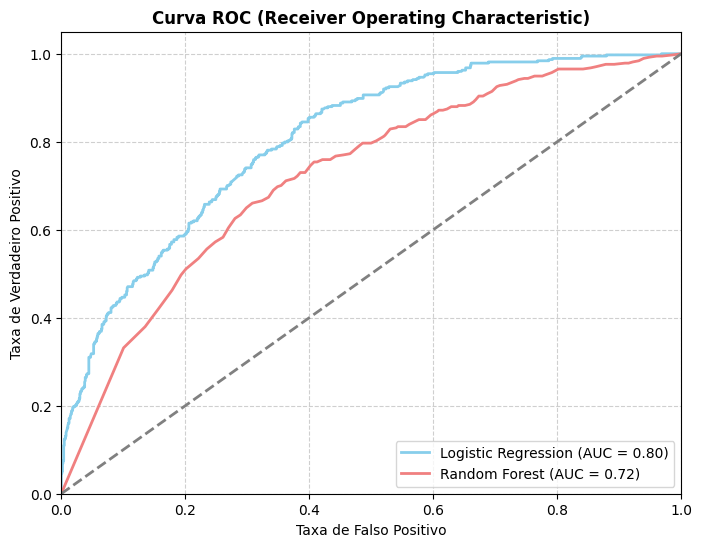


üìâ Matrizes de Confus√£o


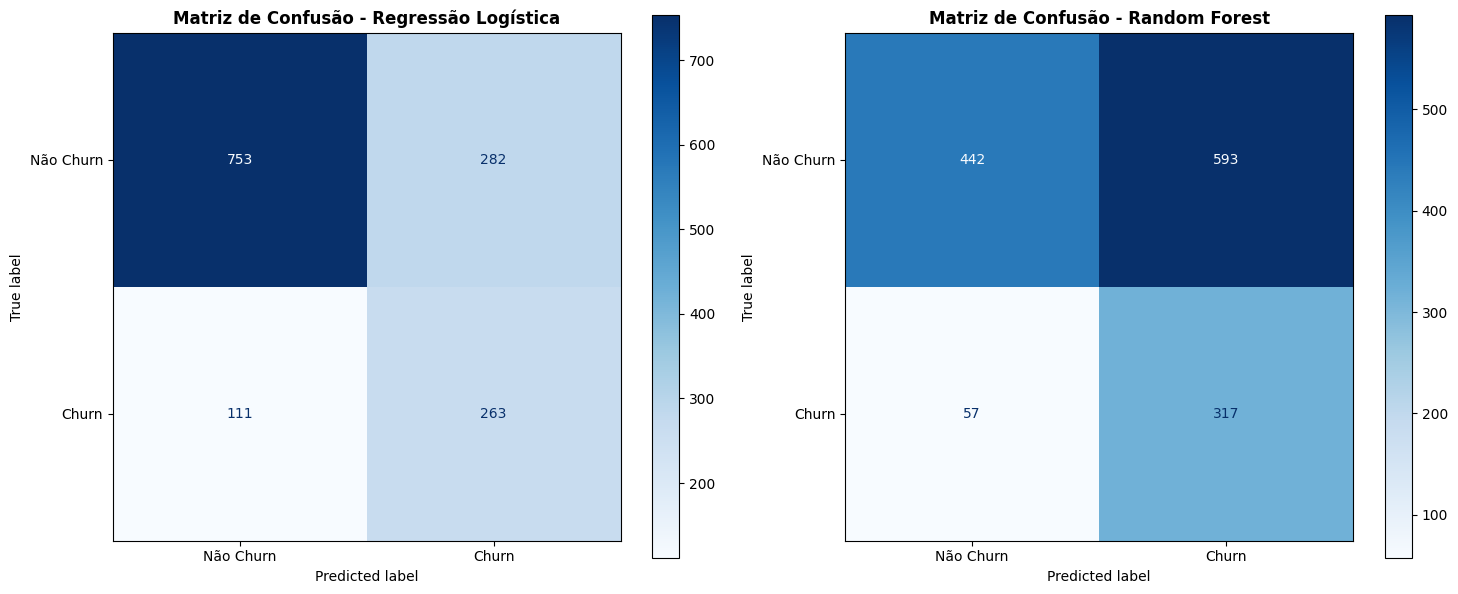


Avalia√ß√£o Visual Conclu√≠da.

üéØ PR√ìXIMOS PASSOS:
   1. ‚úÖ Modelos treinados e avaliados visualmente
   2. üîç Analisar as m√©tricas de avalia√ß√£o (Accuracy, Precision, Recall, F1-Score, ROC AUC)
   3. ‚öñÔ∏è Comparar a performance dos modelos
   4. üõ†Ô∏è Considerar ajuste de hiperpar√¢metros ou outros modelos, se necess√°rio
   5. üìù Documentar os resultados e insights


In [70]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("üìä AVALIA√á√ÉO VISUAL DOS MODELOS")
print("=" * 40)

# Check if models and predictions exist
if 'log_reg' not in globals() or 'rf_model' not in globals() or 'y_test' not in globals() or 'y_proba_lr' not in globals() or 'y_proba_rf' not in globals():
    print("Error: Models have not been trained or predictions are missing. Please run the previous cells.")
else:
    # --- ROC Curve ---
    print("\nüìà Curvas ROC")
    plt.figure(figsize=(8, 6))

    # Logistic Regression ROC
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    plt.plot(fpr_lr, tpr_lr, color='skyblue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

    # Random Forest ROC
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf) # Corrected variable name here
    plt.plot(fpr_rf, tpr_rf, color='lightcoral', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')


    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC (Receiver Operating Characteristic)', fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # --- Confusion Matrices ---
    print("\nüìâ Matrizes de Confus√£o")

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Logistic Regression Confusion Matrix
    cm_lr = confusion_matrix(y_test, y_pred_lr)
    disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['N√£o Churn', 'Churn'])
    disp_lr.plot(cmap='Blues', ax=axes[0])
    axes[0].set_title('Matriz de Confus√£o - Regress√£o Log√≠stica', fontweight='bold')

    # Random Forest Confusion Matrix
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['N√£o Churn', 'Churn'])
    disp_rf.plot(cmap='Blues', ax=axes[1])
    axes[1].set_title('Matriz de Confus√£o - Random Forest', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("\nAvalia√ß√£o Visual Conclu√≠da.")

print("\nüéØ PR√ìXIMOS PASSOS:")
print("   1. ‚úÖ Modelos treinados e avaliados visualmente")
print("   2. üîç Analisar as m√©tricas de avalia√ß√£o (Accuracy, Precision, Recall, F1-Score, ROC AUC)")
print("   3. ‚öñÔ∏è Comparar a performance dos modelos")
print("   4. üõ†Ô∏è Considerar ajuste de hiperpar√¢metros ou outros modelos, se necess√°rio")
print("   5. üìù Documentar os resultados e insights")

# üå≥ An√°lise do Modelo Random Forest

Interpreta√ß√£o da Import√¢ncia das Vari√°veis:
- A import√¢ncia de uma vari√°vel no Random Forest reflete o quanto ela contribuiu para reduzir a impureza nos n√≥s das √°rvores (geralmente usando Gini Importance ou Mean Decrease Impurity).
- Vari√°veis com maior pontua√ß√£o de import√¢ncia s√£o consideradas mais relevantes para prever o churn.
- Diferente dos coeficientes da Regress√£o Log√≠stica, a import√¢ncia n√£o indica a dire√ß√£o do efeito (se a vari√°vel aumenta ou diminui a probabilidade de churn), apenas sua relev√¢ncia geral no modelo.

# Desempenho Geral dos Modelos:

Ambos os modelos apresentam um desempenho moderado na previs√£o de evas√£o de clientes. O modelo de Regress√£o Log√≠stica obteve uma pontua√ß√£o ROC AUC ligeiramente superior (0.80) em compara√ß√£o com o modelo Random Forest (0.72). Isso indica que a Regress√£o Log√≠stica foi um pouco mais eficaz em diferenciar clientes que evadiram daqueles que n√£o evadiram.

## üîç An√°lise da Regress√£o Log√≠stica:

Impacto das Vari√°veis (Coeficientes): Os coeficientes da Regress√£o Log√≠stica revelam a dire√ß√£o e a for√ßa da rela√ß√£o entre cada vari√°vel e a probabilidade de evas√£o. Coeficientes positivos sugerem que um aumento no valor da vari√°vel est√° associado a uma maior chance de evas√£o, enquanto coeficientes negativos indicam uma menor chance. Os coeficientes positivos mais altos apontam para configura√ß√µes espec√≠ficas de clientes e servi√ßos de internet que est√£o fortemente ligadas √† evas√£o. Por outro lado, os coeficientes negativos mais altos indicam configura√ß√µes associadas a uma menor probabilidade de evas√£o, especialmente relacionadas a servi√ßos de internet e maior tempo de contrato.
Matriz de Confus√£o: A matriz de confus√£o da Regress√£o Log√≠stica mostra que o modelo foi razoavelmente bom em identificar corretamente clientes que n√£o evadiram (altos Verdadeiros Negativos), mas teve mais dificuldade em identificar corretamente os clientes que evadiram (baixos Verdadeiros Positivos). Tamb√©m houve um n√∫mero consider√°vel de Falsos Positivos (previs√µes de evas√£o que n√£o ocorreram) e Falsos Negativos (previs√µes de n√£o evas√£o que, na verdade, ocorreram).

## üå≥ An√°lise do Modelo Random Forest:

Import√¢ncia das Vari√°veis: As pontua√ß√µes de import√¢ncia das vari√°veis do modelo Random Forest indicam quais vari√°veis foram mais influentes no processo de decis√£o do modelo. A vari√°vel relacionada a n√£o ter servi√ßo de internet se destacou como a mais importante. Outras vari√°veis relevantes incluem valores espec√≠ficos de tempo de contrato e certas configura√ß√µes de servi√ßos de internet e telefone. Ao contr√°rio dos coeficientes da Regress√£o Log√≠stica, a import√¢ncia no Random Forest n√£o indica a dire√ß√£o do efeito de uma vari√°vel (se aumenta ou diminui a probabilidade de evas√£o), apenas sua relev√¢ncia geral.
Matriz de Confus√£o: A matriz de confus√£o do Random Forest apresentou um padr√£o diferente. Teve um n√∫mero menor de Falsos Positivos, mas um n√∫mero maior de Falsos Negativos. Isso significa que o modelo foi mais cauteloso ao prever a evas√£o, mas deixou de identificar mais casos reais de evas√£o.

### Compara√ß√£o e Insights:

O modelo de Regress√£o Log√≠stica pareceu capturar melhor a rela√ß√£o geral com a evas√£o, refletido em seu ROC AUC mais alto.
O modelo Random Forest destacou a import√¢ncia de combina√ß√µes espec√≠ficas de vari√°veis, especialmente relacionadas aos tipos de servi√ßo.
Ambos os modelos enfrentaram desafios em obter um alto recall para a classe minorit√°ria (evas√£o), o que √© comum em conjuntos de dados desbalanceados, mesmo ap√≥s a aplica√ß√£o de t√©cnicas como o SMOTE. Isso sugere que identificar corretamente todos os clientes que evadem √© uma tarefa dif√≠cil com as vari√°veis e modelos atuais.
A an√°lise dos coeficientes e da import√¢ncia das vari√°veis oferece insights valiosos sobre quais caracter√≠sticas de clientes e configura√ß√µes de servi√ßo est√£o mais fortemente associadas √† evas√£o.